# Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\vishw\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# opening the file

In [2]:
df=pd.read_csv('E:/practice/Phishing_Email.csv')

In [3]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


## removing unnecessary columns

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
df.shape

(18650, 2)

# Removing Null values

In [7]:
df=df.dropna()

Text(0.5, 1.0, 'data before downsampling')

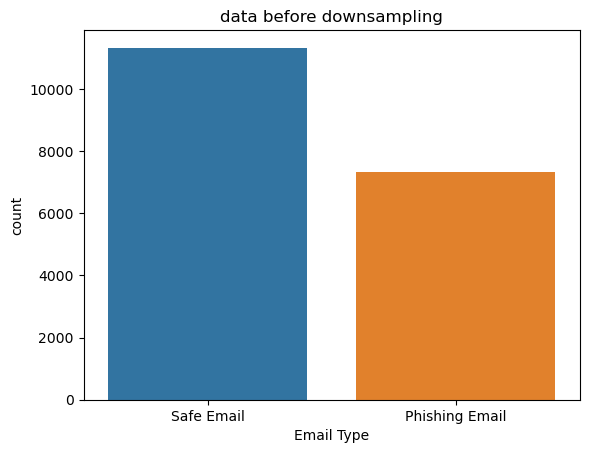

In [8]:
sns.countplot(data=df,x="Email Type")
plt.title("data before downsampling")

In [9]:
# downsampling the excess data
safe=df[df['Email Type']=='Safe Email']
unsafe=df[df['Email Type']=='Phishing Email']
safe=safe.sample(n=len(unsafe),random_state=42)
df=safe.append(unsafe).reset_index(drop=True)

C:\Users\vishw\AppData\Local\Temp\ipykernel_828\559161775.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=safe.append(unsafe).reset_index(drop=True)


Text(0.5, 1.0, 'data after downsampling')

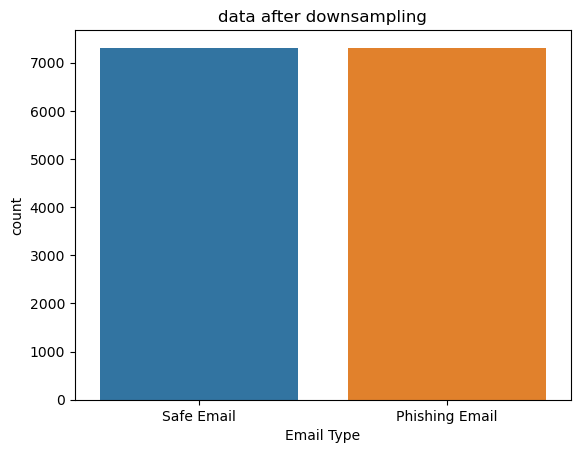

In [10]:
sns.countplot(data=df,x="Email Type")
plt.title("data after downsampling")

In [11]:
df.shape

(14624, 2)

# Label Encoding
## safe-------->0
## pishing mail------>1

In [12]:
df.loc[df["Email Type"]=="Safe Email","Email Type"]=0
df.loc[df["Email Type"]=="Phishing Email","Email Type"]=1


In [13]:
df.head()

,Email Text,Email Type
0,Eirikur said:\n> This incident is an interesti...,0
1,"hpl noms for june 06 , 2000 ( see attached fil...",0
2,"On Tue, Aug 13, 2002 at 12:48:18AM +0100, wint...",0
3,one more . . . http : / / www . cfo . com / ar...,0
4,use Perl Daily NewsletterIn this issue:\n *...,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14624 entries, 0 to 14623
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Email Text  14624 non-null  object
 1   Email Type  14624 non-null  object
dtypes: object(2)
memory usage: 228.6+ KB


# Seperating text and lables

In [15]:
x=df['Email Text']
y=df['Email Type']

In [16]:
print(x)
print(y)

0        Eirikur said:\n> This incident is an interesti...
1        hpl noms for june 06 , 2000 ( see attached fil...
2        On Tue, Aug 13, 2002 at 12:48:18AM +0100, wint...
3        one more . . . http : / / www . cfo . com / ar...
4        use Perl Daily NewsletterIn this issue:\n    *...
                               ...                        
14619    congratulations you have won ! ! ! pls contact...
14620                                                empty
14621    strong buy alert : monthly newsletter topstock...
14622    date a lonely housewife always wanted to date ...
14623                                                empty
Name: Email Text, Length: 14624, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
14619    1
14620    1
14621    1
14622    1
14623    1
Name: Email Type, Length: 14624, dtype: object


In [17]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=5)
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(14624,)
(2925,)
(11699,)


# Feature Extraction

In [18]:
 feature_extraction=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)

In [19]:
xtrainfeatures=feature_extraction.fit_transform(x_train)
xtestfeatures=feature_extraction.transform(x_test)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [20]:
print(xtrainfeatures)

  (0, 61414)	0.07754667431041318
  (0, 19918)	0.08693878433827955
  (0, 73069)	0.09112160829620886
  (0, 42720)	0.06290286962608137
  (0, 78008)	0.1357184470653414
  (0, 40843)	0.03504326018870583
  (0, 66856)	0.1426993725443919
  (0, 69600)	0.1357184470653414
  (0, 68229)	0.1357184470653414
  (0, 55626)	0.130765401613872
  (0, 70955)	0.1426993725443919
  (0, 65063)	0.11680355065577099
  (0, 63417)	0.1357184470653414
  (0, 30148)	0.12692352108776858
  (0, 52944)	0.1211304514434244
  (0, 8706)	0.1357184470653414
  (0, 16893)	0.1188314306833521
  (0, 27361)	0.07587017547228564
  (0, 73867)	0.1426993725443919
  (0, 78338)	0.130765401613872
  (0, 21284)	0.11498955015724867
  (0, 37376)	0.06871266300236656
  (0, 45625)	0.045380010287286804
  (0, 56000)	0.06992563493296325
  (0, 28165)	0.14061368096705565
  :	:
  (2924, 81705)	0.0060381568197675805
  (2924, 22074)	0.030448761265901934
  (2924, 4032)	0.026977675681006317
  (2924, 42268)	0.009029685579053197
  (2924, 85583)	0.01032365784277167

In [21]:
print(xtestfeatures)

  (0, 85337)	0.04144608451632088
  (0, 85315)	0.02961593345021283
  (0, 85309)	0.05031313483226734
  (0, 84284)	0.09086265570514777
  (0, 84006)	0.038613039039725454
  (0, 83905)	0.07427866864453465
  (0, 83796)	0.0607992318464199
  (0, 83389)	0.07427866864453465
  (0, 83388)	0.1412898372118805
  (0, 83334)	0.0472098313337032
  (0, 82906)	0.11244249641991971
  (0, 82854)	0.21898687384054003
  (0, 82326)	0.13613346384721745
  (0, 82125)	0.07064491860594024
  (0, 81705)	0.025388461035874627
  (0, 80056)	0.18630784647305393
  (0, 79721)	0.03949236442616777
  (0, 79108)	0.04133191825519333
  (0, 79065)	0.06443298188501431
  (0, 78465)	0.05278889833918941
  (0, 78456)	0.05822104516408839
  (0, 78375)	0.021870350412072904
  (0, 78047)	0.030485455563236338
  (0, 77351)	0.05320580747693847
  (0, 75979)	0.1485573372890693
  :	:
  (11696, 42267)	0.11688941193787238
  (11696, 37615)	0.14256612213068892
  (11696, 30838)	0.08475205184871219
  (11696, 25260)	0.15598776683288454
  (11696, 15134)	0.12

# Logistic Regression

In [22]:
model=LogisticRegression()
model.fit(xtrainfeatures,y_train)

LogisticRegression()

# Evaluate the train model

In [25]:
# Accuracy on trained data
prediction=model.predict(xtrainfeatures)
accuracy_traineddata=accuracy_score(y_train,prediction)
print("Accuracy on trained data = ",accuracy_traineddata)

Accuracy on trained data =  0.9897435897435898


In [26]:
# Accuracy on test data
prediction=model.predict(xtestfeatures)
accuracy_testdata=accuracy_score(y_test,prediction)
print("accuracy on test data = ",accuracy_testdata)

accuracy on test data =  0.9605094452517309


# Building a predictive model

In [28]:
#safe mail --0
#pishing mail --1
input=["the other side of * galicismos * * galicismo * is a spanish term which names the improper introduction of french words which are spanish sounding and thus very deceptive to the ear . * galicismo * is often considered to be a * barbarismo * . what would be the term which designates the opposite phenomenon , that is unlawful words of spanish origin which may have crept into french ? can someone provide examples ? thank you joseph m kozono < kozonoj @ gunet . georgetown . edu >"]
sample=feature_extraction.transform(input)
prediction=model.predict(sample)
if(prediction==0):
    print("Safe mail")
else:
    print("pishing mail")

Safe mail


In [29]:
#safe mail --0
#pishing mail --1
input=[''' Hello I am your hot lil horny toy.
    I am the one you dream About,
    I am a very open minded person,
    Love to talk about and any subject.
    Fantasy is my way of life, 
    Ultimate in sex play.     Ummmmmmmmmmmmmm
     I am Wet and ready for you.     It is not your looks but your imagination that matters most,
     With My sexy voice I can make your dream come true...
  
     Hurry Up! call me let me Cummmmm for you..........................
TOLL-FREE:             1-877-451-TEEN (1-877-451-8336)For phone billing:     1-900-993-2582
-- 
_______________________________________________
Sign-up for your own FREE Personalized E-mail at Mail.com
http://www.mail.com/?sr=signup",Phishing Email
4,"software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry ."''']
sample=feature_extraction.transform(input)
prediction=model.predict(sample)
if(prediction==0):
    print("Safe mail")
else:
    print("pishing mail")

pishing mail
